In [1]:
import os
import sys

sys.path.append('/home/robinm/phd/problog/')



In [3]:
from problog.program import PrologString
from problog.prolog_engine.translate import TranslatedProgram, translate_clausedb
from problog.engine import DefaultEngine
from problog.logic import Term, Var
from problog.prolog_engine.engine_prolog import EngineProlog
from problog.formula import LogicFormula
from graphviz import Source
from problog.sdd_formula import SDD

In [21]:
file = '''
a(0) :- b(X,2), c(X,2).
a(1) :- b(X,2).
0.5::b(X,2);0.5::c(X,2) :- d(X,Y), e(Z).
d(0,3).
d(1,3).
e(a).
query(a(X)).
'''

# ProbLog

In [32]:
program = PrologString(file)
engine = DefaultEngine()
db = engine.prepare(program)

[]


1: atom(identifier=26, probability=None, group=None, name=d(0,3), source=d(0,3), is_extra=False)
2: atom(identifier=27, probability=None, group=None, name=d(1,3), source=d(1,3), is_extra=False)
3: atom(identifier=28, probability=None, group=None, name=e(a), source=e(a), is_extra=False)
4: conj(children=(1, 3), name=None)
5: conj(children=(2, 3), name=None)
6: atom(identifier=(9, (0, 3, a) {{}}, 0), probability=0.5, group=(9, (0, 3, a) {{}}), name=choice(9,0,b(0,2),0,3,a), source=choice(9,0,b(0,2),0,3,a), is_extra=False)
7: conj(children=(4, 6), name=None)
8: atom(identifier=(9, (1, 3, a) {{}}, 0), probability=0.5, group=(9, (1, 3, a) {{}}), name=choice(9,0,b(1,2),1,3,a), source=choice(9,0,b(1,2),1,3,a), is_extra=False)
9: conj(children=(5, 8), name=None)
10: conj(children=(1, 3), name=None)
11: atom(identifier=(9, (0, 3, a) {{}}, 1), probability=0.5, group=(9, (0, 3, a) {{}}), name=choice(9,1,c(0,2),0,3,a), source=choice(9,1,c(0,2),0,3,a), is_extra=False)
12: atom(identifier='(9, (0, 3

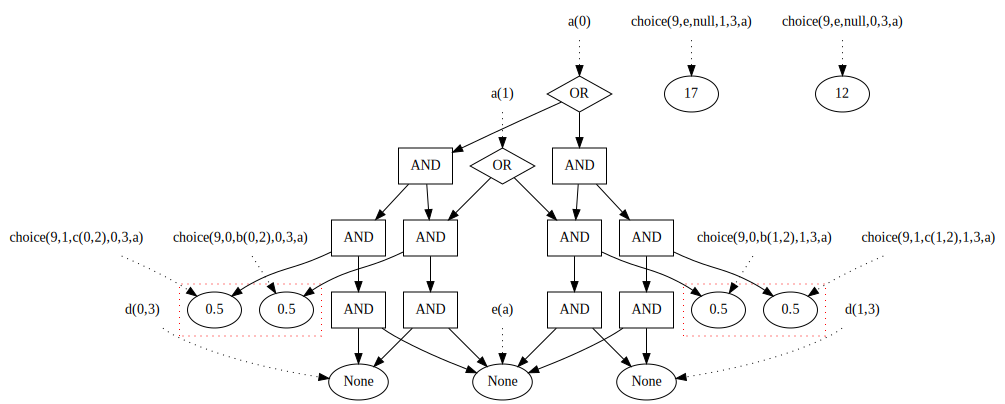

In [27]:
ground = engine.ground_all(db, target=LogicFormula(keep_all=True))
print(ground)
Source(ground.to_dot())

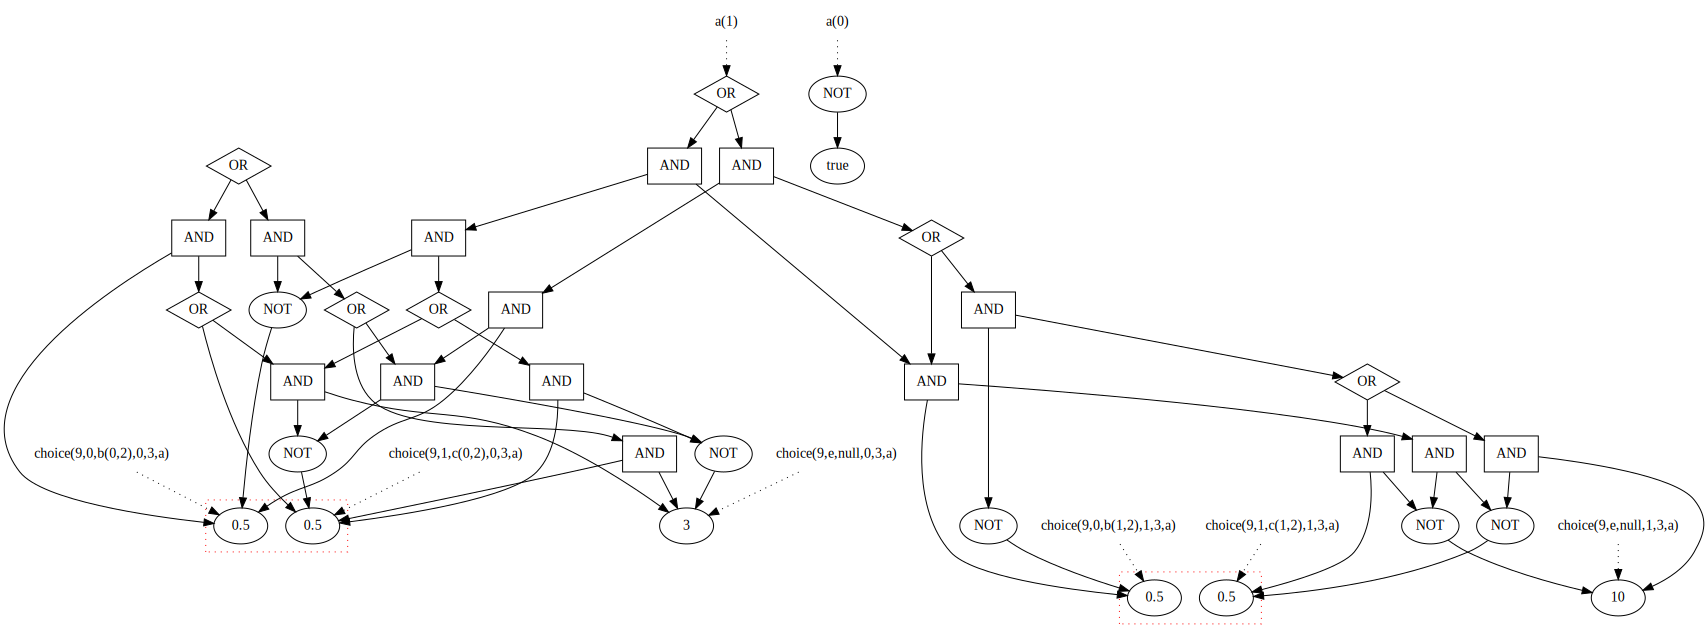

In [28]:
ac = SDD.create_from(ground)
Source(ac.to_dot())

In [29]:
ac.evaluate()

{a(0): 0.0, a(1): 0.7500000000000001}

# New engine

1: atom(identifier=26, probability=None, group=None, name=d(0,3), source=d(0,3), is_extra=False)
2: atom(identifier=27, probability=None, group=None, name=d(1,3), source=d(1,3), is_extra=False)
3: atom(identifier=28, probability=None, group=None, name=e(a), source=e(a), is_extra=False)
4: conj(children=(1, 3), name=None)
5: conj(children=(2, 3), name=None)
6: atom(identifier=(9, (0, 3, a) {{}}, 0), probability=0.5, group=(9, (0, 3, a) {{}}), name=choice(9,0,b(0,2),0,3,a), source=choice(9,0,b(0,2),0,3,a), is_extra=False)
7: conj(children=(4, 6), name=None)
8: atom(identifier=(9, (1, 3, a) {{}}, 0), probability=0.5, group=(9, (1, 3, a) {{}}), name=choice(9,0,b(1,2),1,3,a), source=choice(9,0,b(1,2),1,3,a), is_extra=False)
9: conj(children=(5, 8), name=None)
10: conj(children=(1, 3), name=None)
11: atom(identifier=(9, (0, 3, a) {{}}, 1), probability=0.5, group=(9, (0, 3, a) {{}}), name=choice(9,1,c(0,2),0,3,a), source=choice(9,1,c(0,2),0,3,a), is_extra=False)
12: atom(identifier='(9, (0, 3

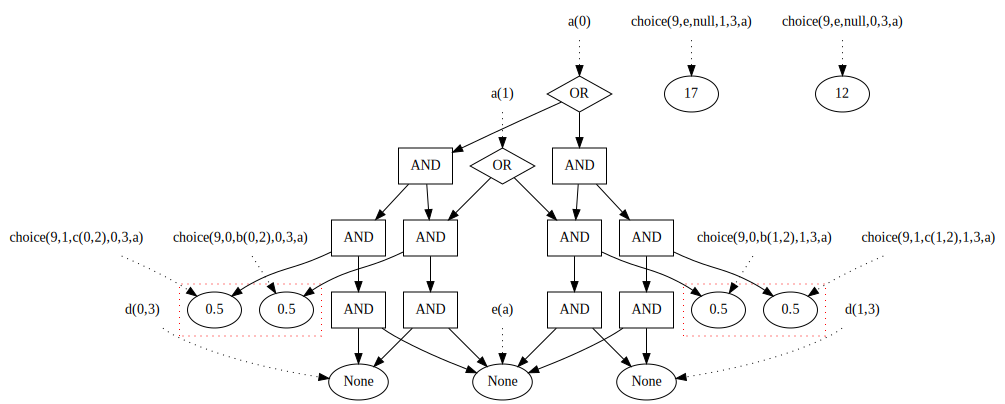

In [33]:
ground = engine.ground_all(db, target=LogicFormula(keep_all=True))
print(ground)
Source(ground.to_dot())

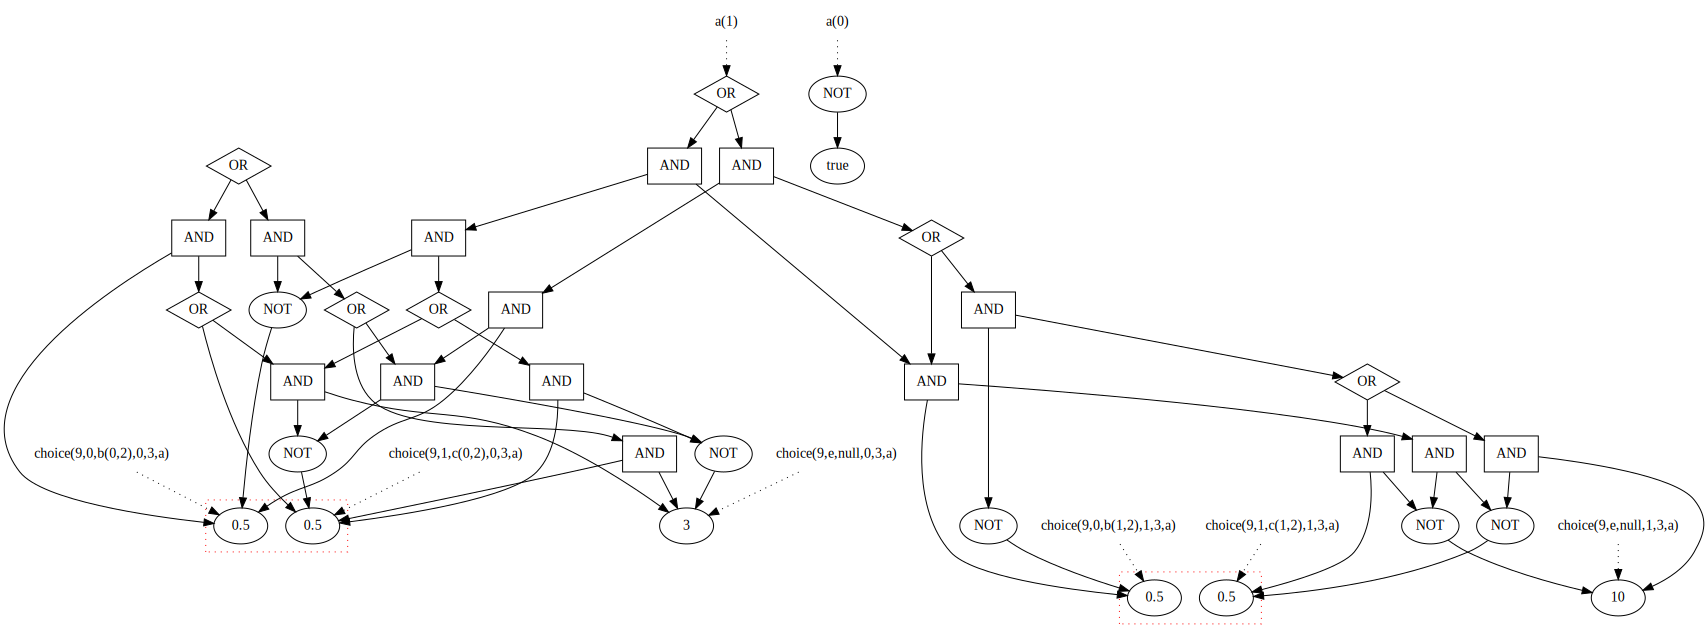

In [34]:
ac = SDD.create_from(ground)
Source(ac.to_dot())

In [35]:
ac.evaluate()

{a(0): 0.0, a(1): 0.7500000000000001}